In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20121201", periods=5)
dates

DatetimeIndex(['2012-12-01', '2012-12-02', '2012-12-03', '2012-12-04',
               '2012-12-05'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(5, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2012-12-01,-1.270267,-1.609742,1.385995,-0.852544
2012-12-02,-0.491594,-2.060703,1.172907,0.249161
2012-12-03,0.132116,0.560404,1.141723,1.608580
2012-12-04,0.202974,1.159831,-1.163231,-1.335967
2012-12-05,0.941968,-0.082056,1.129091,-0.563592


In [5]:
size = 7
columnE = np.tile(["test", "train"], size)

df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.date_range("20121201", periods=size),
        "C": np.ones(size, dtype="float32"),
        "D": np.ones(size, dtype="int32") * 3,
        "E": pd.Categorical(columnE[:size]),
        "F": "foo"
    }
)
display(df2.dtypes)
df2

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

,A,B,C,D,E,F
0,1.0,2012-12-01,1.0,3,test,foo
1,1.0,2012-12-02,1.0,3,train,foo
2,1.0,2012-12-03,1.0,3,test,foo
3,1.0,2012-12-04,1.0,3,train,foo
4,1.0,2012-12-05,1.0,3,test,foo
5,1.0,2012-12-06,1.0,3,train,foo
6,1.0,2012-12-07,1.0,3,test,foo


In [6]:
df2.head()

,A,B,C,D,E,F
0,1.0,2012-12-01,1.0,3,test,foo
1,1.0,2012-12-02,1.0,3,train,foo
2,1.0,2012-12-03,1.0,3,test,foo
3,1.0,2012-12-04,1.0,3,train,foo
4,1.0,2012-12-05,1.0,3,test,foo


In [7]:
df2.tail(1)

,A,B,C,D,E,F
6,1.0,2012-12-07,1.0,3,test,foo


In [8]:
df2.to_numpy()

array([[1.0, Timestamp('2012-12-01 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2012-12-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2012-12-03 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2012-12-04 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2012-12-05 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2012-12-06 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2012-12-07 00:00:00'), 1.0, 3, 'test', 'foo']],
      dtype=object)

In [9]:
df2.describe()

,A,B,C,D
count,7.0,7,7.0,7.0
mean,1.0,2012-12-04 00:00:00,1.0,3.0
min,1.0,2012-12-01 00:00:00,1.0,3.0
25%,1.0,2012-12-02 12:00:00,1.0,3.0
50%,1.0,2012-12-04 00:00:00,1.0,3.0
75%,1.0,2012-12-05 12:00:00,1.0,3.0
max,1.0,2012-12-07 00:00:00,1.0,3.0
std,0.0,NaN,0.0,0.0


In [10]:
df2.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2012-12-01,1.0
1,foo,train,3,1.0,2012-12-02,1.0
2,foo,test,3,1.0,2012-12-03,1.0
3,foo,train,3,1.0,2012-12-04,1.0
4,foo,test,3,1.0,2012-12-05,1.0
5,foo,train,3,1.0,2012-12-06,1.0
6,foo,test,3,1.0,2012-12-07,1.0


In [11]:
df2.sort_values(by="E")

,A,B,C,D,E,F
0,1.0,2012-12-01,1.0,3,test,foo
2,1.0,2012-12-03,1.0,3,test,foo
4,1.0,2012-12-05,1.0,3,test,foo
6,1.0,2012-12-07,1.0,3,test,foo
1,1.0,2012-12-02,1.0,3,train,foo
3,1.0,2012-12-04,1.0,3,train,foo
5,1.0,2012-12-06,1.0,3,train,foo


In [12]:
display(df["A"])
display(df.A)

2012-12-01   -1.270267
2012-12-02   -0.491594
2012-12-03    0.132116
2012-12-04    0.202974
2012-12-05    0.941968
Freq: D, Name: A, dtype: float64

2012-12-01   -1.270267
2012-12-02   -0.491594
2012-12-03    0.132116
2012-12-04    0.202974
2012-12-05    0.941968
Freq: D, Name: A, dtype: float64

In [13]:
display(df["20121201":"20121203"])
display(df[:3])
display(df.loc[:"20121203", "A":"B"])
display(df.iloc[:3, :2])

,A,B,C,D
2012-12-01,-1.270267,-1.609742,1.385995,-0.852544
2012-12-02,-0.491594,-2.060703,1.172907,0.249161
2012-12-03,0.132116,0.560404,1.141723,1.608580


,A,B,C,D
2012-12-01,-1.270267,-1.609742,1.385995,-0.852544
2012-12-02,-0.491594,-2.060703,1.172907,0.249161
2012-12-03,0.132116,0.560404,1.141723,1.608580


,A,B
2012-12-01,-1.270267,-1.609742
2012-12-02,-0.491594,-2.060703
2012-12-03,0.132116,0.560404


,A,B
2012-12-01,-1.270267,-1.609742
2012-12-02,-0.491594,-2.060703
2012-12-03,0.132116,0.560404


In [14]:
display(df.iloc[1,1])
display(df.iat[1,1]) # faster for single values

-2.0607034019854704

-2.0607034019854704

In [15]:
df[df.B > 0.5]

,A,B,C,D
2012-12-03,0.132116,0.560404,1.141723,1.608580
2012-12-04,0.202974,1.159831,-1.163231,-1.335967


In [16]:
df[df > 0.5]

,A,B,C,D
2012-12-01,NaN,NaN,1.385995,NaN
2012-12-02,NaN,NaN,1.172907,NaN
2012-12-03,NaN,0.560404,1.141723,1.60858
2012-12-04,NaN,1.159831,NaN,NaN
2012-12-05,0.941968,NaN,1.129091,NaN


In [17]:
df2["E"] = np.random.choice(["one", "two", "three", "four"], size)
df2

,A,B,C,D,E,F
0,1.0,2012-12-01,1.0,3,four,foo
1,1.0,2012-12-02,1.0,3,one,foo
2,1.0,2012-12-03,1.0,3,three,foo
3,1.0,2012-12-04,1.0,3,four,foo
4,1.0,2012-12-05,1.0,3,two,foo
5,1.0,2012-12-06,1.0,3,four,foo
6,1.0,2012-12-07,1.0,3,three,foo


In [18]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E,F
0,1.0,2012-12-01,1.0,3,four,foo
3,1.0,2012-12-04,1.0,3,four,foo
4,1.0,2012-12-05,1.0,3,two,foo
5,1.0,2012-12-06,1.0,3,four,foo


In [19]:
s1 = pd.Series(np.arange(6) + 1, index=pd.date_range("20121201", periods=6))
s1

2012-12-01    1
2012-12-02    2
2012-12-03    3
2012-12-04    4
2012-12-05    5
2012-12-06    6
Freq: D, dtype: int64

In [20]:
df["F"] = s1
df

,A,B,C,D,F
2012-12-01,-1.270267,-1.609742,1.385995,-0.852544,1
2012-12-02,-0.491594,-2.060703,1.172907,0.249161,2
2012-12-03,0.132116,0.560404,1.141723,1.608580,3
2012-12-04,0.202974,1.159831,-1.163231,-1.335967,4
2012-12-05,0.941968,-0.082056,1.129091,-0.563592,5


In [21]:
# df[df.loc[dates[:3]]["F"]]= 0
df.at[dates[0], "F"] = 6
df

,A,B,C,D,F
2012-12-01,-1.270267,-1.609742,1.385995,-0.852544,6
2012-12-02,-0.491594,-2.060703,1.172907,0.249161,2
2012-12-03,0.132116,0.560404,1.141723,1.608580,3
2012-12-04,0.202974,1.159831,-1.163231,-1.335967,4
2012-12-05,0.941968,-0.082056,1.129091,-0.563592,5


In [22]:
df.iat[0, 1] = 0.567899
df

,A,B,C,D,F
2012-12-01,-1.270267,0.567899,1.385995,-0.852544,6
2012-12-02,-0.491594,-2.060703,1.172907,0.249161,2
2012-12-03,0.132116,0.560404,1.141723,1.608580,3
2012-12-04,0.202974,1.159831,-1.163231,-1.335967,4
2012-12-05,0.941968,-0.082056,1.129091,-0.563592,5


In [23]:
df = df.loc[:, "A":"F"]
df

,A,B,C,D,F
2012-12-01,-1.270267,0.567899,1.385995,-0.852544,6
2012-12-02,-0.491594,-2.060703,1.172907,0.249161,2
2012-12-03,0.132116,0.560404,1.141723,1.608580,3
2012-12-04,0.202974,1.159831,-1.163231,-1.335967,4
2012-12-05,0.941968,-0.082056,1.129091,-0.563592,5


In [24]:
df["D"] = np.linspace(1, 15, 5, dtype="int32")
df

,A,B,C,D,F
2012-12-01,-1.270267,0.567899,1.385995,1,6
2012-12-02,-0.491594,-2.060703,1.172907,4,2
2012-12-03,0.132116,0.560404,1.141723,8,3
2012-12-04,0.202974,1.159831,-1.163231,11,4
2012-12-05,0.941968,-0.082056,1.129091,15,5


In [25]:
df = df.loc[:, "A":"D"]
df

,A,B,C,D
2012-12-01,-1.270267,0.567899,1.385995,1
2012-12-02,-0.491594,-2.060703,1.172907,4
2012-12-03,0.132116,0.560404,1.141723,8
2012-12-04,0.202974,1.159831,-1.163231,11
2012-12-05,0.941968,-0.082056,1.129091,15


In [26]:
df[df < 0] = -df
df

,A,B,C,D
2012-12-01,1.270267,0.567899,1.385995,1
2012-12-02,0.491594,2.060703,1.172907,4
2012-12-03,0.132116,0.560404,1.141723,8
2012-12-04,0.202974,1.159831,1.163231,11
2012-12-05,0.941968,0.082056,1.129091,15


In [27]:
df[np.random.choice([True, False], df.shape)] = -df
df

,A,B,C,D
2012-12-01,-1.270267,0.567899,-1.385995,-1
2012-12-02,0.491594,-2.060703,1.172907,-4
2012-12-03,0.132116,-0.560404,1.141723,8
2012-12-04,-0.202974,1.159831,-1.163231,11
2012-12-05,-0.941968,0.082056,1.129091,-15


In [28]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2012-12-01,-1.270267,0.567899,-1.385995,-1,1.0
2012-12-02,0.491594,-2.060703,1.172907,-4,1.0
2012-12-03,0.132116,-0.560404,1.141723,8,NaN
2012-12-04,-0.202974,1.159831,-1.163231,11,NaN


In [29]:
df1[df1.isna()] = 99
df1

,A,B,C,D,E
2012-12-01,-1.270267,0.567899,-1.385995,-1,1.0
2012-12-02,0.491594,-2.060703,1.172907,-4,1.0
2012-12-03,0.132116,-0.560404,1.141723,8,99.0
2012-12-04,-0.202974,1.159831,-1.163231,11,99.0


In [30]:
display(df.mean())
display(np.array(df.mean()))
df["F"] = np.array(df.mean(axis=1))
df

A   -0.358300
B   -0.162264
C    0.178899
D   -0.200000
dtype: float64

array([-0.35829965, -0.16226431,  0.17889897, -0.2       ])

,A,B,C,D,F
2012-12-01,-1.270267,0.567899,-1.385995,-1,-0.772091
2012-12-02,0.491594,-2.060703,1.172907,-4,-1.099051
2012-12-03,0.132116,-0.560404,1.141723,8,2.178359
2012-12-04,-0.202974,1.159831,-1.163231,11,2.698406
2012-12-05,-0.941968,0.082056,1.129091,-15,-3.682705


In [31]:
s = pd.Series([1, 3, 5, np.nan, 6], index=dates).shift(2)
display(s)

df2 = df.sub(s, axis="index")
df2

2012-12-01    NaN
2012-12-02    NaN
2012-12-03    1.0
2012-12-04    3.0
2012-12-05    5.0
Freq: D, dtype: float64

,A,B,C,D,F
2012-12-01,NaN,NaN,NaN,NaN,NaN
2012-12-02,NaN,NaN,NaN,NaN,NaN
2012-12-03,-0.867884,-1.560404,0.141723,7.0,1.178359
2012-12-04,-3.202974,-1.840169,-4.163231,8.0,-0.301594
2012-12-05,-5.941968,-4.917944,-3.870909,-20.0,-8.682705


In [32]:
s = pd.DataFrame(np.random.choice(["A", "B", "C"], [5, 2]), index=dates)
s.columns = ["X", "Y"]
display(s)

display(s.value_counts())
display(s["X"].value_counts())

,X,Y
2012-12-01,A,A
2012-12-02,C,A
2012-12-03,A,B
2012-12-04,C,A
2012-12-05,C,C


X  Y
C  A    2
A  A    1
   B    1
C  C    1
Name: count, dtype: int64

X
C    3
A    2
Name: count, dtype: int64

In [33]:
s = pd.Series(np.random.choice(["A", "B"], [5]))
display(s)

s = s.str.lower()
display(s)

0    B
1    A
2    A
3    B
4    B
dtype: object

0    b
1    a
2    a
3    b
4    b
dtype: object

In [34]:
s = pd.DataFrame(
        {
            "X": np.random.choice(["a", "b"], [5]), 
            "Y": np.random.choice(["a", "b"], [5]), 
            "Z": np.random.randn(5)
        },
        index=dates
    )
display(s)

s.groupby(["X"]).sum()

,X,Y,Z
2012-12-01,a,a,-2.923109
2012-12-02,b,b,0.188453
2012-12-03,b,a,0.336376
2012-12-04,b,a,-0.547714
2012-12-05,a,b,-0.778129


,Y,Z
X,,
a,ab,-3.701238
b,baa,-0.022885


In [35]:
size = 7
df = pd.DataFrame(
    {
        "A": np.random.choice(["one", "two", "three"], size),
        "B": np.random.choice(["A", "B", "C"], size),
        "C": np.random.choice(["foo", "bar"], size),
        "D": np.random.randn(size),
        "E": np.arange(1, size + 1),
    }
)
df

,A,B,C,D,E
0,three,B,bar,1.234394,1
1,three,A,bar,-0.022242,2
2,one,C,bar,1.704177,3
3,three,C,foo,-0.853304,4
4,three,B,foo,-0.273491,5
5,one,C,foo,0.919438,6
6,two,B,foo,1.271932,7


In [36]:
df.pivot_table(values="D", index=["A"], columns=["E"])

E,1,2,3,4,5,6,7
A,,,,,,,
one,NaN,NaN,1.704177,NaN,NaN,0.919438,NaN
three,1.234394,-0.022242,NaN,-0.853304,-0.273491,NaN,NaN
two,NaN,NaN,NaN,NaN,NaN,NaN,1.271932


In [37]:
rng = pd.date_range("13/12/2012", periods=100, freq="30s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
display(ts)
ts.resample("5Min").sum()

2012-12-13 00:00:00    348
2012-12-13 00:00:30    186
2012-12-13 00:01:00    353
2012-12-13 00:01:30     73
2012-12-13 00:02:00     97
                      ... 
2012-12-13 00:47:30    222
2012-12-13 00:48:00    217
2012-12-13 00:48:30    239
2012-12-13 00:49:00    355
2012-12-13 00:49:30     80
Freq: 30s, Length: 100, dtype: int64

2012-12-13 00:00:00    2085
2012-12-13 00:05:00    2086
2012-12-13 00:10:00    2758
2012-12-13 00:15:00    1947
2012-12-13 00:20:00    3081
2012-12-13 00:25:00    2633
2012-12-13 00:30:00    2030
2012-12-13 00:35:00    2705
2012-12-13 00:40:00    2518
2012-12-13 00:45:00    2518
Freq: 5min, dtype: int64

In [38]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-12-13 00:00:00+00:00    348
2012-12-13 00:00:30+00:00    186
2012-12-13 00:01:00+00:00    353
2012-12-13 00:01:30+00:00     73
2012-12-13 00:02:00+00:00     97
                            ... 
2012-12-13 00:47:30+00:00    222
2012-12-13 00:48:00+00:00    217
2012-12-13 00:48:30+00:00    239
2012-12-13 00:49:00+00:00    355
2012-12-13 00:49:30+00:00     80
Freq: 30s, Length: 100, dtype: int64

In [39]:
ts_usae = ts_utc.tz_convert("US/Eastern") # only for timezone-aware time series
ts_usae

2012-12-12 19:00:00-05:00    348
2012-12-12 19:00:30-05:00    186
2012-12-12 19:01:00-05:00    353
2012-12-12 19:01:30-05:00     73
2012-12-12 19:02:00-05:00     97
                            ... 
2012-12-12 19:47:30-05:00    222
2012-12-12 19:48:00-05:00    217
2012-12-12 19:48:30-05:00    239
2012-12-12 19:49:00-05:00    355
2012-12-12 19:49:30-05:00     80
Freq: 30s, Length: 100, dtype: int64

In [40]:
rng = pd.date_range("03/07/2012", periods=5)
display(rng)
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-07', '2012-03-08', '2012-03-09', '2012-03-10',
               '2012-03-11'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-03-14', '2012-03-15', '2012-03-16', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

In [47]:
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6], 
        "raw_grade": ["a", "b", "b", "a", "a", "e"]
    }
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [48]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"] 

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [49]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [50]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [54]:
display(df.sort_values(by="grade"))
display(df.groupby("grade", observed=False).size())

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [57]:
import matplotlib.pyplot as plt
plt.close("all")

<Axes: >

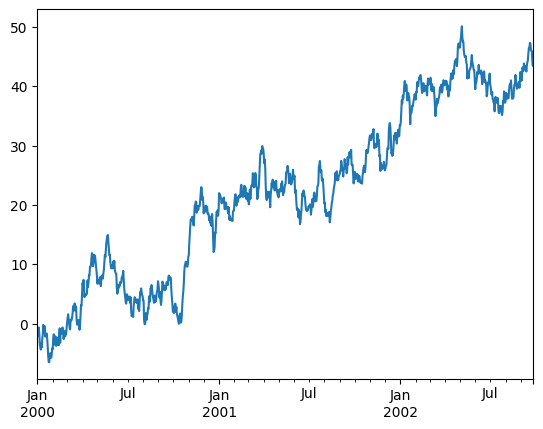

In [66]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

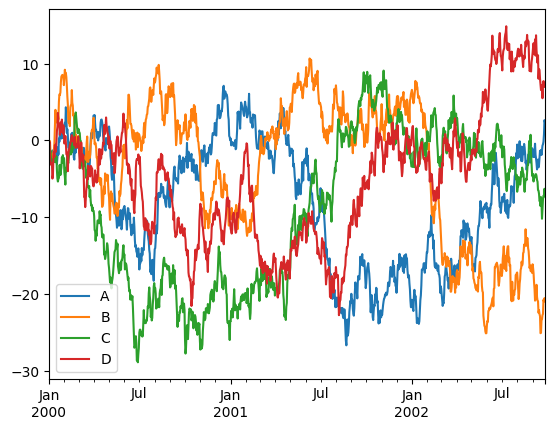

In [74]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

plt.figure()
df.plot()
plt.legend(loc='best')